In [115]:
#Load needed python routines

from matplotlib import pyplot as plt
import xrayutilities as xu
from scipy import misc
import os
import numpy as np
import pandas as pd
import peakutils
from matplotlib import rcParams
from matplotlib import patches
import sys

In [116]:
#Load 4-id-c functions 
from s4idc_funcs_v2 import *

In [117]:
#Set Fonts/Plot Style

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 18})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [118]:
#Choose data file
specpath = "./data/"
specfile = "SSFeb21_mca.mca"

# Get the spec file
sf = specFile(specpath+specfile)
df = get_specScan(sf, 237)  #use file number
df.columns

Index(['SGM1:Energy', 'Sum_reflectivity', 'XMCD_reflectivity', 'Sum_TEY',
       'XMCD_TEY', 'Sum_FY', 'XMCD_FY', 'reference', 'ID04b:set_energy.VAL',
       'i0_A', 'TEY_A', '0', 'REF_A', 'i0_B', 'TEY_B', '01', 'REF_B',
       'XMCD_Sum', 'XMCD_Sum1', 'XMCD_Sum2', 'XMCD_TEY1', 'XMCD_TFY',
       'XMCD_REF', '4idc1:scaler1_calc6.VAL', '4idc1:scaler1.S7',
       'Magnet_Field', '4idc1:scaler2.S8', 'Data_anal', 'Data_anal1',
       'XMCD_Sum3', 'XMCD_Sum4', 'XMCD_TFY1', 'TEYN_1', 'TEYN_2', 'XMCD_TEY2',
       'REFN_1', 'REFN_2', 'XMCD_REF1', 'XMCD_Sum5', 'XMCD_Sum6', 'XMCD_Sum7',
       'i/o_fix', 'RFM_Focus', '4idc1:scaler1.S10',
       'Format_string_for_Ctl_query', 'Index'],
      dtype='object')

In [119]:

temp = np.arange(7,33,3)   #(sample 4(100) H=2T) 
Erscan_pT = np.arange(84,102,2)   
Prscan_pT = np.arange(85,103,2)


#temp= np.arange(7,33,3)   #sample 4(100) H=-2T
Erscan_nT = np.arange(128,146,2)
Prscan_nT = np.arange(129,147,2)




Erdata_pT = []
Erdata_nT = []

Prdata_pT = []
Prdata_nT = []

for i in range(len(temp)):
    Erdata_pT.append(XMCD(sf,Erscan_pT[i]))
    Erdata_nT.append(XMCD(sf,Erscan_nT[i]))
    
    Prdata_pT.append(XMCD(sf,Prscan_pT[i]))
    Prdata_nT.append(XMCD(sf,Prscan_nT[i]))
    
Erdata_pT = np.array(Erdata_pT)
Erdata_nT= np.array(Erdata_nT)

Prdata_pT = np.array(Prdata_pT)
Prdata_nT= np.array(Prdata_nT)



In [120]:
energy_pT_Er = Erdata_pT[:,0,:]
tey_sum_pT_Er = Erdata_pT[:,3,:]
xmcd_tey_pT_Er = Erdata_pT[:,4,:]

energy_pT_Pr = Prdata_pT[:,0,:]
tey_sum_pT_Pr = Prdata_pT[:,3,:]
xmcd_tey_pT_Pr = Prdata_pT[:,4,:]

energy_nT_Er= Erdata_nT[:,0,:]
tey_sum_nT_Er= Erdata_nT[:,3,:]
xmcd_tey_nT_Er= Erdata_nT[:,4,:]

energy_nT_Pr= Prdata_nT[:,0,:]
tey_sum_nT_Pr= Prdata_nT[:,3,:]
xmcd_tey_nT_Pr= Prdata_nT[:,4,:]


Text(0.5, 1.0, 'Er XMCD')

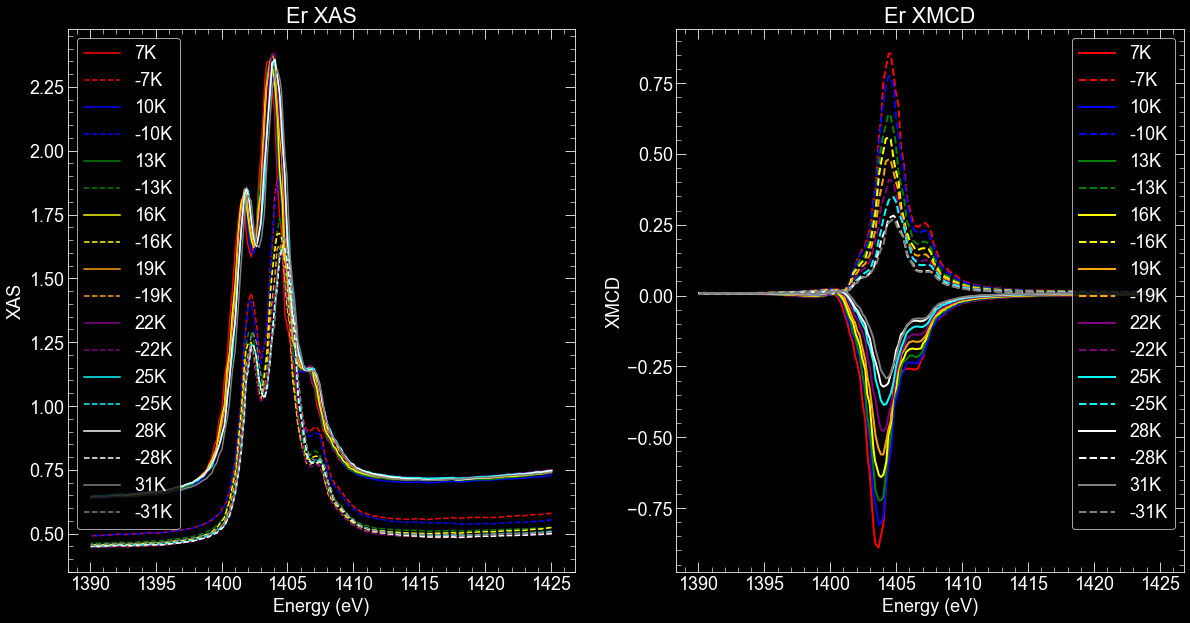

In [121]:
#Look at backgrounds and subtracted data ER
col = ["red", "blue" , "green", 'yellow', 'orange', 'purple', 'cyan', 'white', 'gray', 'navy', 'pink', 'olive', 'orchid', 'sienna']
colors=[]
for i in range(len(temp)):
    colors.append(col[i])
    
plt.style.use('dark_background')
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.set_title('Er XAS')
for i in range(len(temp)):
    ax1.plot(energy_pT_Er[i,:],tey_sum_pT_Er[i,:],color=colors[i],label=str(temp[i])+'K')
    ax1.plot(energy_nT_Er[i,:],tey_sum_nT_Er[i,:],color=colors[i],linestyle='--',label='-'+str(temp[i])+'K')
    
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)

ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
for i in range(len(temp)):
    ax2.plot(energy_pT_Er[i,:],xmcd_tey_pT_Er[i,:],lw=2,color=colors[i],label=str(temp[i])+'K')
    ax2.plot(energy_nT_Er[i,:],xmcd_tey_nT_Er[i,:],lw=2,color=colors[i],linestyle='--',label='-'+str(temp[i])+'K')
ax2.legend(loc=0)
ax2.set_title('Er XMCD')


Text(0.5, 1.0, 'Pr XMCD')

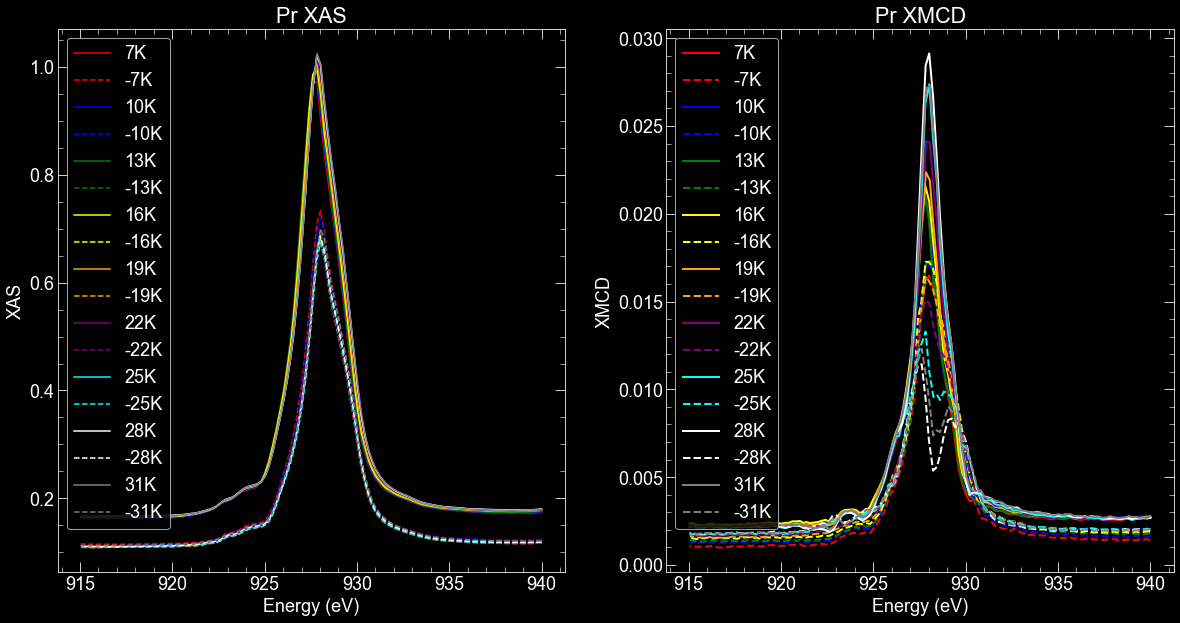

In [122]:
#Look at backgrounds and subtracted data Pr
plt.style.use('dark_background')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.set_title('Pr XAS')
for i in range(len(temp)):
    ax1.plot(energy_pT_Pr[i,:],tey_sum_pT_Pr[i,:],color=colors[i],label=str(temp[i])+'K')
    ax1.plot(energy_nT_Pr[i,:],tey_sum_nT_Pr[i,:],color=colors[i],linestyle='--',label='-'+str(temp[i])+'K')
    
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)

ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
for i in range(len(temp)):
    ax2.plot(energy_pT_Pr[i,:],xmcd_tey_pT_Pr[i,:],lw=2,color=colors[i],label=str(temp[i])+'K')
    ax2.plot(energy_nT_Pr[i,:],xmcd_tey_nT_Pr[i,:],lw=2,color=colors[i],linestyle='--',label='-'+str(temp[i])+'K')
ax2.legend(loc=2)
ax2.set_title('Pr XMCD')

In [123]:
#Fix energy shifts
peak_pos_Er_pT= []
peak_pos_Er_nT= []
peak_pos_Pr_pT= []
peak_pos_Pr_nT= []
for i in range(len(temp)):
    peak_Er_pT = np.where(tey_sum_pT_Er[i,:]==np.nanmax(tey_sum_pT_Er[i,:]))
    peak_Er_nT = np.where(tey_sum_nT_Er[i,:]==np.nanmax(tey_sum_nT_Er[i,:]))
    peak_Pr_pT = np.where(tey_sum_pT_Pr[i,:]==np.nanmax(tey_sum_pT_Pr[i,:]))
    peak_Pr_nT = np.where(tey_sum_nT_Pr[i,:]==np.nanmax(tey_sum_nT_Pr[i,:]))

    peak_pos_Er_pT.append(peak_Er_pT)
    peak_pos_Er_nT.append(peak_Er_nT)
    peak_pos_Pr_pT.append(peak_Pr_pT)
    peak_pos_Pr_nT.append(peak_Pr_nT)

dif_Eng_Er= []
dif_Eng_Pr= []
for i in range(len(temp)):     
    dif_Er = energy_pT_Er[i,:][peak_pos_Er_pT[i]] - energy_nT_Er[i,:][peak_pos_Er_nT[i]]
    dif_Pr = energy_pT_Pr[i,:][peak_pos_Pr_pT[i]] - energy_nT_Pr[i,:][peak_pos_Pr_nT[i]]
    dif_Eng_Er.append(dif_Er)
    dif_Eng_Pr.append(dif_Pr)

for i in range(len(temp)): 
    energy_nT_Er[i,:] += dif_Eng_Er[i]
    energy_nT_Pr[i,:] += dif_Eng_Pr[i]

        

In [124]:
sctey_pT_Er= np.zeros(tey_sum_pT_Er.shape)
scxmcd_tey_pT_Er= np.zeros(tey_sum_pT_Er.shape)

sctey_pT_Pr= np.zeros(tey_sum_pT_Pr.shape)
scxmcd_tey_pT_Pr= np.zeros(tey_sum_pT_Pr.shape)

for i in range(len(temp)):
    sctey_pT_Er[i,:], scxmcd_tey_pT_Er[i,:] = norm_xmcd(tey_sum_pT_Er[i,:], xmcd_tey_pT_Er[i,:])
    sctey_pT_Pr[i,:], scxmcd_tey_pT_Pr[i,:] = norm_xmcd(tey_sum_pT_Pr[i,:], xmcd_tey_pT_Pr[i,:])


    
sctey_nT_Er = np.zeros(tey_sum_nT_Er.shape)
scxmcd_tey_nT_Er = np.zeros(tey_sum_nT_Er.shape)

sctey_nT_Pr = np.zeros(tey_sum_nT_Pr.shape)
scxmcd_tey_nT_Pr = np.zeros(tey_sum_nT_Pr.shape)

for i in range(len(temp)):
    sctey_nT_Er[i,:], scxmcd_tey_nT_Er[i,:] = norm_xmcd(tey_sum_nT_Er[i,:], xmcd_tey_nT_Er[i,:])
    sctey_nT_Pr[i,:], scxmcd_tey_nT_Pr[i,:] = norm_xmcd(tey_sum_nT_Pr[i,:], xmcd_tey_nT_Pr[i,:])
    
#Correct XMCD zero

for i in range(len(temp)):
    scxmcd_tey_pT_Er[i,:] -=  np.average(scxmcd_tey_pT_Er[i,-5:-1])
    scxmcd_tey_nT_Er[i,:] -=  np.average(scxmcd_tey_nT_Er[i,-5:-1])
    
    scxmcd_tey_pT_Pr[i,:] -=  np.average(scxmcd_tey_pT_Pr[i,-5:-1])
    scxmcd_tey_nT_Pr[i,:] -=  np.average(scxmcd_tey_nT_Pr[i,-5:-1])

Normalization:  1.7093420915140003
Normalization:  0.810901760304
Normalization:  1.69234916903
Normalization:  0.821178576628
Normalization:  1.719214183688
Normalization:  0.8289878150810001
Normalization:  1.702956949282
Normalization:  0.8370815738470001
Normalization:  1.7278483946610002
Normalization:  0.843245610385
Normalization:  1.7345260507750002
Normalization:  0.85024764166
Normalization:  1.7103066708180001
Normalization:  0.8538477607259999
Normalization:  1.7137020260680003
Normalization:  0.8542694722770001
Normalization:  1.6766357414270001
Normalization:  0.8591385745689999
Normalization:  1.454218123268
Normalization:  0.6183735884830001
Normalization:  1.408071946388
Normalization:  0.608158989059
Normalization:  1.270282540942
Normalization:  0.5814402954750001
Normalization:  1.221223297215
Normalization:  0.5739494148169999
Normalization:  1.1822862392250002
Normalization:  0.565994188195
Normalization:  1.155867864934
Normalization:  0.566608328706
Normalizatio

Text(0.5, 1.0, 'Er XMCD')

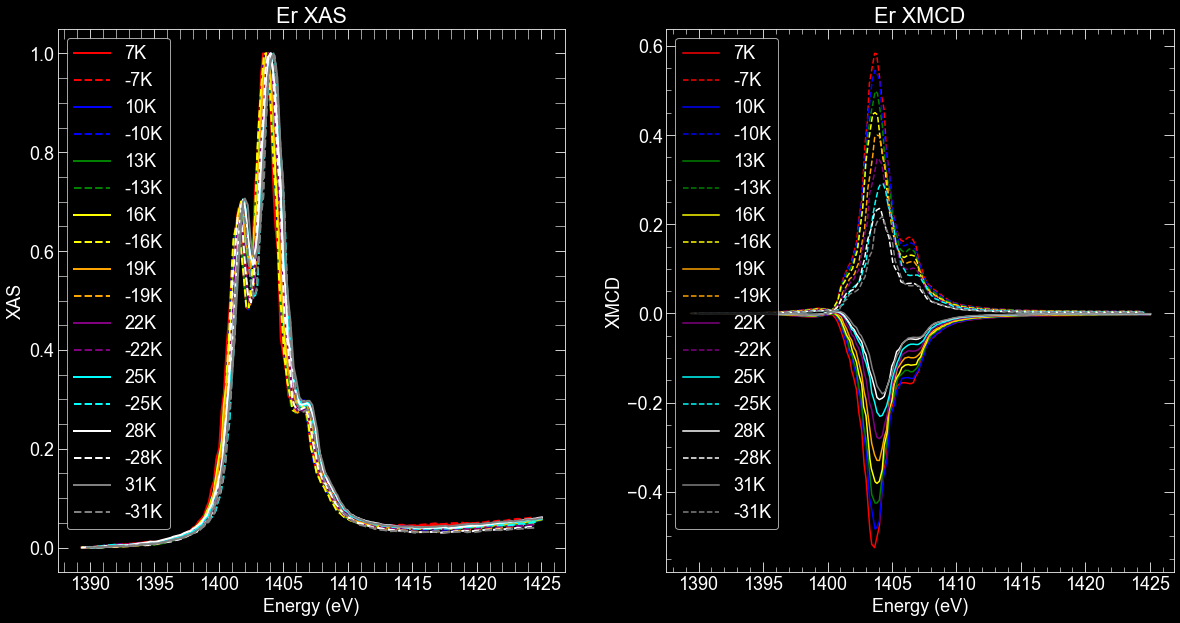

In [125]:
#Look at backgrounds and subtracted data Er
plt.style.use('dark_background')
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
for i in range(len(temp)):
    ax1.plot(energy_pT_Er[i,:],sctey_pT_Er[i,:],linewidth=2, color=colors[i],label=str(temp[i])+'K')
    ax1.plot(energy_nT_Er[i,:],sctey_nT_Er[i,:],linewidth=2, linestyle='--', color=colors[i],label='-'+str(temp[i])+'K')
ax1.legend()
ax1.set_title('Er XAS')

#Look at backgrounds and subtracted data

ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
for i in range(len(temp)):
    ax2.plot(energy_pT_Er[i,:],scxmcd_tey_pT_Er[i,:],color=colors[i],label=str(temp[i])+'K')
    ax2.plot(energy_nT_Er[i,:],scxmcd_tey_nT_Er[i,:],color=colors[i],linestyle='--',label='-'+str(temp[i])+'K')

ax2.legend()
ax2.set_title('Er XMCD')
 

Text(0.5, 1.0, 'Pr XMCD')

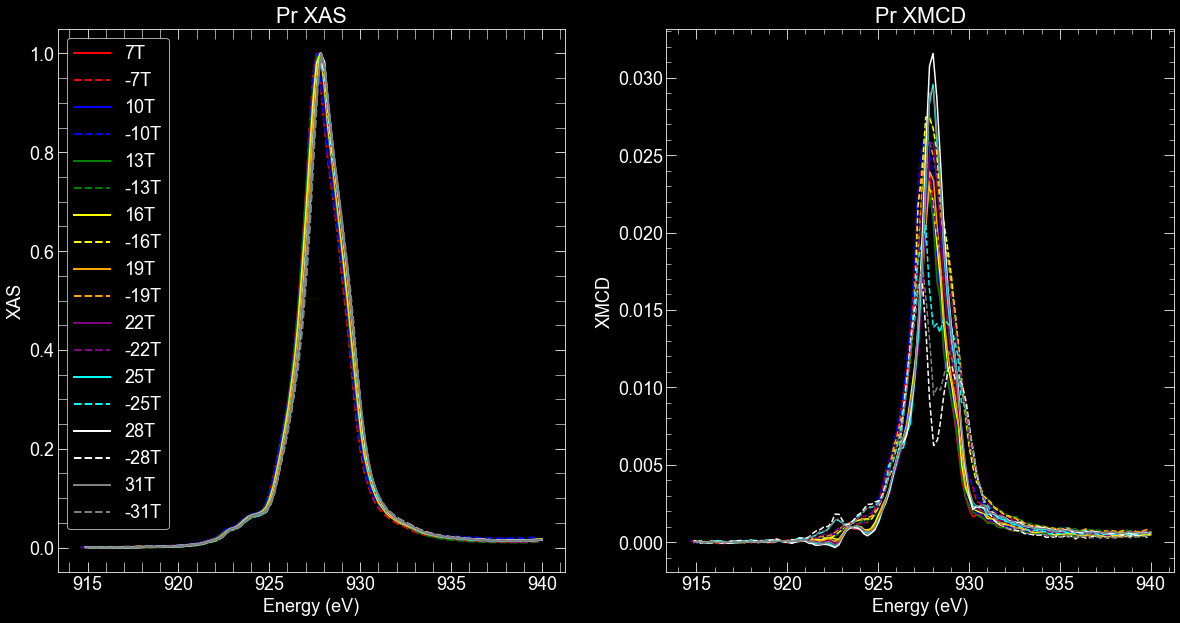

In [126]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
for i in range(len(temp)):
    ax1.plot(energy_pT_Pr[i,:],sctey_pT_Pr[i,:],linewidth=2, color=colors[i],label=str(temp[i])+'T')
    ax1.plot(energy_nT_Pr[i,:],sctey_nT_Pr[i,:],linewidth=2, linestyle='--', color=colors[i],label='-'+str(temp[i])+'T')
ax1.legend()
ax1.set_title('Pr XAS')

#Look at backgrounds and subtracted data


ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
for i in range(len(temp)):
    ax2.plot(energy_pT_Pr[i,:],scxmcd_tey_pT_Pr[i,:],color=colors[i],label=str(temp[i])+'T')
    ax2.plot(energy_nT_Pr[i,:],scxmcd_tey_nT_Pr[i,:],color=colors[i],linestyle='--',label='-'+str(temp[i])+'T')

ax1.legend(loc=2)
ax2.set_title('Pr XMCD')

In [127]:
sctey_sum_Er= np.zeros(sctey_pT_Er.shape)
scxmcd_tey_dif_Er= np.zeros(scxmcd_tey_pT_Er.shape)

sctey_sum_Pr= np.zeros(sctey_pT_Pr.shape)
scxmcd_tey_dif_Pr= np.zeros(scxmcd_tey_pT_Pr.shape)

for i in range(len(temp)):
    sctey_sum_Er[i,:]=(sctey_pT_Er[i,:]+np.interp(energy_pT_Er[i,:],energy_nT_Er[i,:],sctey_nT_Er[i,:]))/2
    scxmcd_tey_dif_Er[i,:] = (scxmcd_tey_pT_Er[i,:] - np.interp(energy_pT_Er[i,:],energy_nT_Er[i,:],scxmcd_tey_nT_Er[i,:]))/2
    sctey_sum_Pr[i,:]=(sctey_pT_Pr[i,:]+np.interp(energy_pT_Pr[i,:],energy_nT_Pr[i,:],sctey_nT_Pr[i,:]))/2
    scxmcd_tey_dif_Pr[i,:] = (scxmcd_tey_pT_Pr[i,:] - np.interp(energy_pT_Pr[i,:],energy_nT_Pr[i,:],scxmcd_tey_nT_Pr[i,:]))/2
  
    
#scxmcd_tey_dif +=.0003

In [128]:
scxmcd_tey_dif_Er1.shape

(9, 176)

Text(0.5, 1.0, 'Pr XMCD Diff')

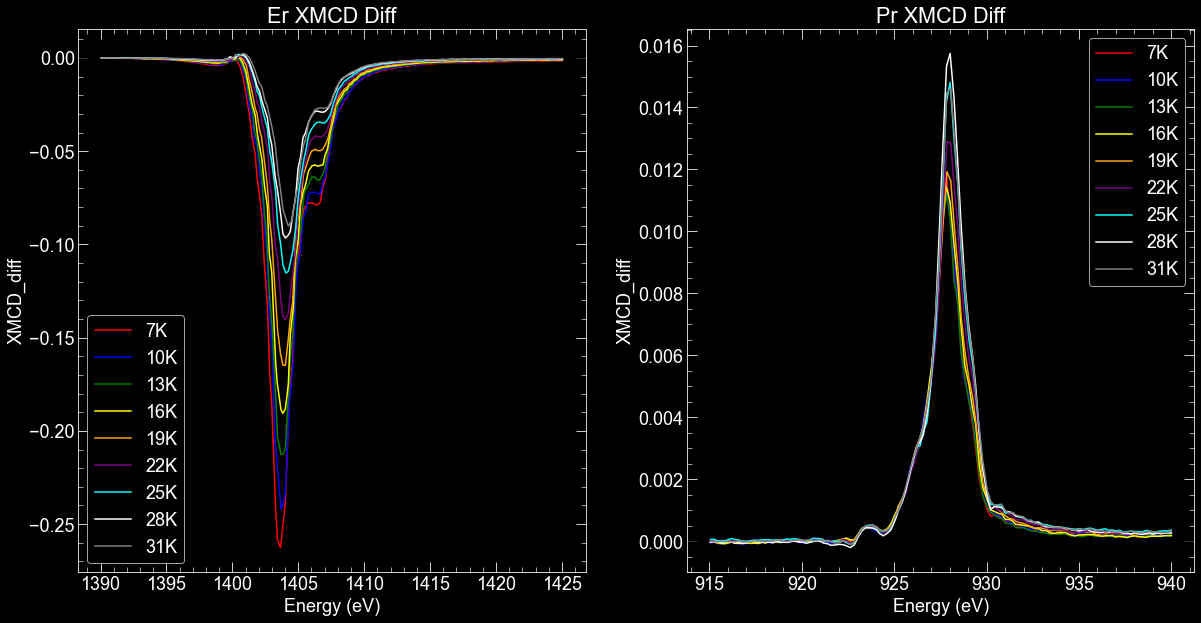

In [129]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.set_ylabel('XMCD_diff')
ax1.set_xlabel('Energy (eV)')
ax1.axhline(0,color='k')
for i in range(len(temp)):
    ax1.plot(energy_pT_Er[i,:],scxmcd_tey_dif_Er[i,:],color=colors[i],label=str(temp[i])+'K')
ax1.legend()
ax1.set_title('Er XMCD Diff')
#Look at backgrounds and subtracted data Pr

ax2.set_ylabel('XMCD_diff')
ax2.set_xlabel('Energy (eV)')
ax2.axhline(0,color='k')
for i in range(len(temp)):
    ax2.plot(energy_pT_Pr[i,:],scxmcd_tey_dif_Pr[i,:],color=colors[i],label=str(temp[i])+'K')
ax2.legend()
ax2.set_title('Pr XMCD Diff')

In [130]:
#Simple XMCD height analysis
Pk_scxmcd_dif_Er= np.zeros(temp.shape)
Pk_scxmcd_dif_Pr= np.zeros(temp.shape)

for i in range(len(temp)):
    if abs(np.nanmax(scxmcd_tey_dif_Er[i,:])) >  abs(np.nanmin(scxmcd_tey_dif_Er[i,:])):
        Pk_scxmcd_dif_Er[i] = np.nanmax(scxmcd_tey_dif_Er[i,:])
    else:
        Pk_scxmcd_dif_Er[i] = np.nanmin(scxmcd_tey_dif_Er[i,:])
                 
for i in range(len(temp)):
    if abs(np.nanmax(scxmcd_tey_dif_Pr[i,:]))>abs(np.nanmin(scxmcd_tey_dif_Pr[i,:])):             
        Pk_scxmcd_dif_Pr[i] = np.nanmax(scxmcd_tey_dif_Pr[i,:])
    else:
        Pk_scxmcd_dif_Pr[i] = np.nanmin(scxmcd_tey_dif_Pr[i,:])


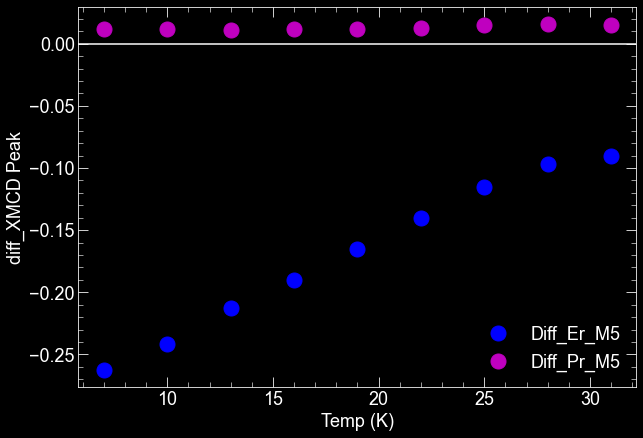

In [21]:
plt.style.use('dark_background')
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('diff_XMCD Peak')
ax.set_xlabel('Temp (K)')
ax.plot(temp,Pk_scxmcd_dif_Er, 'bo', label='Diff_Er_M5', markersize=15);
ax.plot(temp,Pk_scxmcd_dif_Pr, 'mo', label='Diff_Pr_M5', markersize=15);
ax.axhline(0,color='w')
ax.legend(frameon=False)

In [61]:
#for all three directions

field_100 = []  
Pk_scxmcd_dif_Er_100=[]
Pk_scxmcd_dif_Pr_100=[]

field_110 = []  
Pk_scxmcd_dif_Er_110=[]
Pk_scxmcd_dif_Pr_110=[]

field_111 = []  
Pk_scxmcd_dif_Er_111=[]
Pk_scxmcd_dif_Pr_111=[]

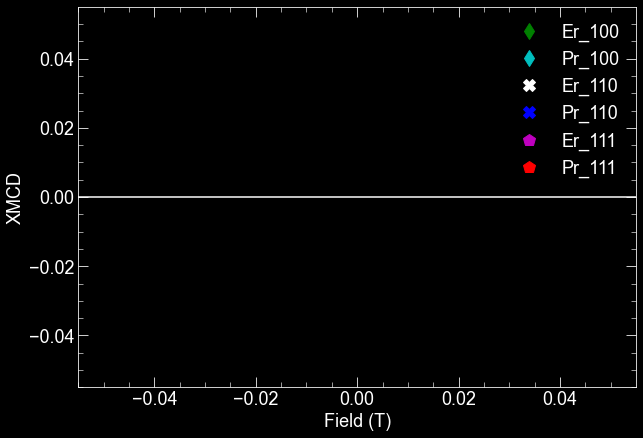

In [62]:
#plot for all three directions
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('XMCD')
ax.set_xlabel('Field (T)')
ax.plot(field_100,Pk_scxmcd_dif_Er_100, 'd',label='Er_100',color='g',markersize=12)
ax.plot(field_100,Pk_scxmcd_dif_Pr_100,'d', label='Pr_100', color='c',markersize=12)
ax.plot(field_110,Pk_scxmcd_dif_Er_110, 'X',label='Er_110', color='w',markersize=12)
ax.plot(field_110,Pk_scxmcd_dif_Pr_110,'X',label='Pr_110', color='b',markersize=12)  
ax.plot(field_111,Pk_scxmcd_dif_Er_111, 'p',label='Er_111', color='m',markersize=12)
ax.plot(field_111,Pk_scxmcd_dif_Pr_111, 'p',label='Pr_111', color='r',markersize=12)
ax.axhline(0,color='w')
ax.legend(frameon=False)